In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import  mean_absolute_percentage_error,root_mean_squared_error, r2_score,mean_squared_error


In [2]:
df = pd.read_csv('garments_worker_productivity.csv')
df.iloc[0]

date                     1/1/2015
quarter                  Quarter1
department                 sweing
day                      Thursday
team                            8
targeted_productivity         0.8
smv                         26.16
wip                        1108.0
over_time                    7080
incentive                      98
idle_time                     0.0
idle_men                        0
no_of_style_change              0
no_of_workers                59.0
actual_productivity      0.940725
Name: 0, dtype: object

In [3]:
print(df.head())
print(df.info())
print(df.describe())

       date   quarter  department       day  team  targeted_productivity  \
0  1/1/2015  Quarter1      sweing  Thursday     8                   0.80   
1  1/1/2015  Quarter1  finishing   Thursday     1                   0.75   
2  1/1/2015  Quarter1      sweing  Thursday    11                   0.80   
3  1/1/2015  Quarter1      sweing  Thursday    12                   0.80   
4  1/1/2015  Quarter1      sweing  Thursday     6                   0.80   

     smv     wip  over_time  incentive  idle_time  idle_men  \
0  26.16  1108.0       7080         98        0.0         0   
1   3.94     NaN        960          0        0.0         0   
2  11.41   968.0       3660         50        0.0         0   
3  11.41   968.0       3660         50        0.0         0   
4  25.90  1170.0       1920         50        0.0         0   

   no_of_style_change  no_of_workers  actual_productivity  
0                   0           59.0             0.940725  
1                   0            8.0        

In [4]:
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
team,1197.0,6.426901,3.463963,1.000000,3.000000,6.000000,9.000000,12.000000
targeted_productivity,1197.0,0.729632,0.097891,0.070000,0.700000,0.750000,0.800000,0.800000
smv,1197.0,15.062172,10.943219,2.900000,3.940000,15.260000,24.260000,54.560000
wip,691.0,1190.465991,1837.455001,7.000000,774.500000,1039.000000,1252.500000,23122.000000
over_time,1197.0,4567.460317,3348.823563,0.000000,1440.000000,3960.000000,6960.000000,25920.000000
incentive,1197.0,38.210526,160.182643,0.000000,0.000000,0.000000,50.000000,3600.000000
idle_time,1197.0,0.730159,12.709757,0.000000,0.000000,0.000000,0.000000,300.000000
idle_men,1197.0,0.369256,3.268987,0.000000,0.000000,0.000000,0.000000,45.000000
no_of_style_change,1197.0,0.150376,0.427848,0.000000,0.000000,0.000000,0.000000,2.000000
no_of_workers,1197.0,34.609858,22.197687,2.000000,9.000000,34.000000,57.000000,89.000000


In [6]:
df['wip'].fillna(df['wip'].median(),inplace=True)

C:\Users\gamer\AppData\Local\Temp\ipykernel_8576\2194174985.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['wip'].fillna(df['wip'].median(),inplace=True)


In [7]:
df.isna().sum()


date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

In [8]:
def handle_outliers(df, columns):

    for column in columns:

        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
       
        print(f"Outliers detected in {column}: {len(outliers)}")
        
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
        
        
    return df

In [9]:
colums =['idle_time', 'incentive', 'actual_productivity']
df_outliers = handle_outliers(df,colums)

Outliers detected in idle_time: 18
Outliers detected in incentive: 11
Outliers detected in actual_productivity: 50


In [10]:

df_outliers = df_outliers.reset_index(drop=True)
df_outliers.describe().T

,count,mean,std,min,25%,50%,75%,max
team,1118.0,6.383721,3.490668,1.00000,3.000000,6.00,9.000000,12.000000
targeted_productivity,1118.0,0.735662,0.089713,0.07000,0.700000,0.75,0.800000,0.800000
smv,1118.0,15.055349,10.864859,2.90000,3.940000,15.26,23.540000,54.560000
wip,1118.0,1139.922182,1441.275151,10.00000,987.000000,1039.00,1093.750000,23122.000000
over_time,1118.0,4624.499106,3298.197497,0.00000,1440.000000,4080.00,6960.000000,15120.000000
incentive,1118.0,27.007156,30.566744,0.00000,0.000000,23.00,50.000000,119.000000
idle_time,1118.0,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000
idle_men,1118.0,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000
no_of_style_change,1118.0,0.142218,0.419305,0.00000,0.000000,0.00,0.000000,2.000000
no_of_workers,1118.0,34.730322,22.135811,2.00000,9.000000,34.00,57.000000,89.000000


In [11]:

encoder = OneHotEncoder(sparse_output=False,handle_unknown='ignore')
columns_categral = ['day','quarter','department']
df_outliers = df_outliers.drop_duplicates()
encoder_value = encoder.fit_transform(df_outliers[columns_categral])
categorical_df = pd.DataFrame(encoder_value, columns=encoder.get_feature_names_out(columns_categral))

# Combine with original DataFrame and drop original categorical columns
df_encoded = pd.concat([df_outliers.reset_index(drop=True), categorical_df.reset_index(drop=True)], axis=1)
df_encoded = df_encoded.drop(columns=columns_categral)

# Display the final DataFrame

df_encoded

,date,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,...,day_Tuesday,day_Wednesday,quarter_Quarter1,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,department_finishing,department_finishing,department_sweing
0,1/1/2015,8,0.80,26.16,1108.0,7080,98,0.0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1/1/2015,1,0.75,3.94,1039.0,960,0,0.0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1/1/2015,11,0.80,11.41,968.0,3660,50,0.0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1/1/2015,12,0.80,11.41,968.0,3660,50,0.0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1/1/2015,6,0.80,25.90,1170.0,1920,50,0.0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113,3/11/2015,10,0.75,2.90,1039.0,960,0,0.0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1114,3/11/2015,8,0.70,3.90,1039.0,960,0,0.0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1115,3/11/2015,7,0.65,3.90,1039.0,960,0,0.0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1116,3/11/2015,9,0.75,2.90,1039.0,1800,0,0.0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [12]:
df_encoded

,date,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,...,day_Tuesday,day_Wednesday,quarter_Quarter1,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,department_finishing,department_finishing,department_sweing
0,1/1/2015,8,0.80,26.16,1108.0,7080,98,0.0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1/1/2015,1,0.75,3.94,1039.0,960,0,0.0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1/1/2015,11,0.80,11.41,968.0,3660,50,0.0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1/1/2015,12,0.80,11.41,968.0,3660,50,0.0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1/1/2015,6,0.80,25.90,1170.0,1920,50,0.0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113,3/11/2015,10,0.75,2.90,1039.0,960,0,0.0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1114,3/11/2015,8,0.70,3.90,1039.0,960,0,0.0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1115,3/11/2015,7,0.65,3.90,1039.0,960,0,0.0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1116,3/11/2015,9,0.75,2.90,1039.0,1800,0,0.0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [13]:
df_encoded['date'] = pd.to_datetime(df_encoded['date'])

# Extract day of the week and month
df_encoded['day_of_week'] = df_encoded['date'].dt.weekday  # Get the name of the day
df_encoded['month'] = df_encoded['date'].dt.month

In [14]:
scaler = StandardScaler()
columns = ['smv',	'wip'	,'over_time',	'incentive']
standardized_values = scaler.fit_transform(df_encoded[columns])

# Create a DataFrame from the standardized values
standardized_df = pd.DataFrame(standardized_values, columns=columns)

# Option 1: Concatenate the standardized values back to df_encoded
df_encoded[columns] = standardized_df

In [15]:
df_encoded

,date,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,...,quarter_Quarter1,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,department_finishing,department_finishing,department_sweing,day_of_week,month
0,2015-01-01,8,0.80,1.022528,-0.022158,0.744831,2.323591,0.0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,1
1,2015-01-01,1,0.75,-1.023513,-0.070054,-1.111558,-0.883942,0.0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3,1
2,2015-01-01,11,0.80,-0.335668,-0.119338,-0.292563,0.752554,0.0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,1
3,2015-01-01,12,0.80,-0.335668,-0.119338,-0.292563,0.752554,0.0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,1
4,2015-01-01,6,0.80,0.998587,0.020878,-0.820360,0.752554,0.0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113,2015-03-11,10,0.75,-1.119277,-0.070054,-1.111558,-0.883942,0.0,0,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2,3
1114,2015-03-11,8,0.70,-1.027196,-0.070054,-1.111558,-0.883942,0.0,0,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2,3
1115,2015-03-11,7,0.65,-1.027196,-0.070054,-1.111558,-0.883942,0.0,0,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2,3
1116,2015-03-11,9,0.75,-1.119277,-0.070054,-0.856760,-0.883942,0.0,0,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2,3


In [16]:
df_encoded.to_csv('cleaned_worker_productivity.csv',index=False)

In [17]:
df_cleaned = pd.read_csv('cleaned_worker_productivity.csv')

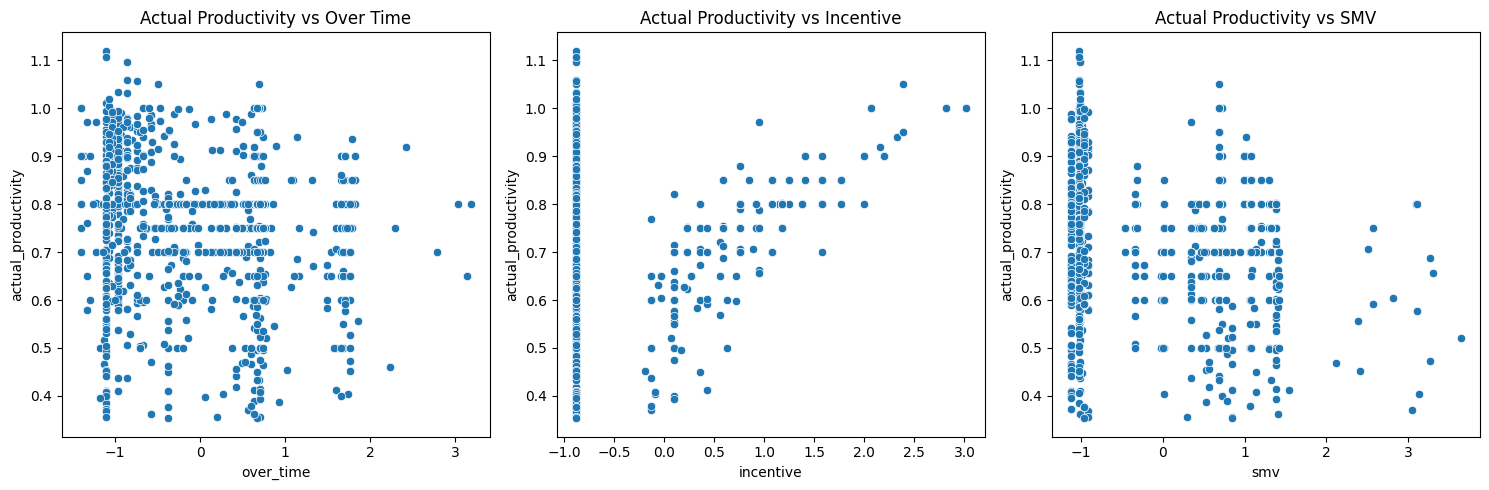

In [18]:
plt.figure(figsize=(15, 5))

# Scatter plot for actual_productivity vs over_time
plt.subplot(1, 3, 1)
sns.scatterplot(data=df_cleaned, x='over_time', y='actual_productivity')
plt.title('Actual Productivity vs Over Time')

# Scatter plot for actual_productivity vs incentive
plt.subplot(1, 3, 2)
sns.scatterplot(data=df_cleaned, x='incentive', y='actual_productivity')
plt.title('Actual Productivity vs Incentive')

# Scatter plot for actual_productivity vs smv
plt.subplot(1, 3, 3)
sns.scatterplot(data=df_cleaned, x='smv', y='actual_productivity')
plt.title('Actual Productivity vs SMV')

plt.tight_layout()
plt.show()

In [19]:
df_corr = df_cleaned[["actual_productivity",'over_time', 'incentive', 'smv','wip','no_of_style_change','no_of_workers'	]]

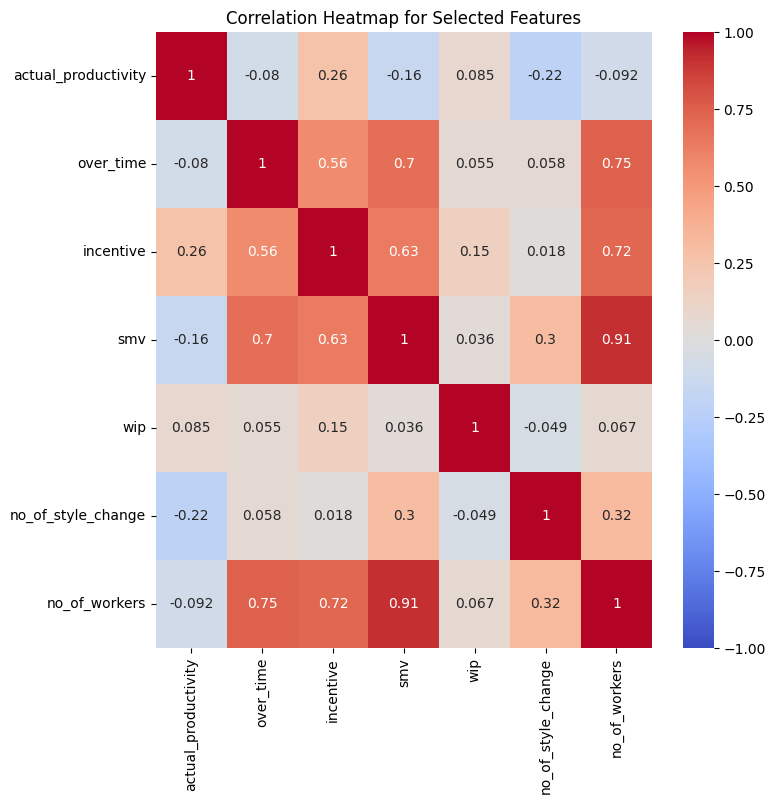

In [20]:
corr = df_corr.corr()
plt.figure(figsize=(8,8))
sns.heatmap(data=corr, annot=True, cmap='coolwarm',vmax=1,vmin=-1)
plt.title('Correlation Heatmap for Selected Features')
plt.show()

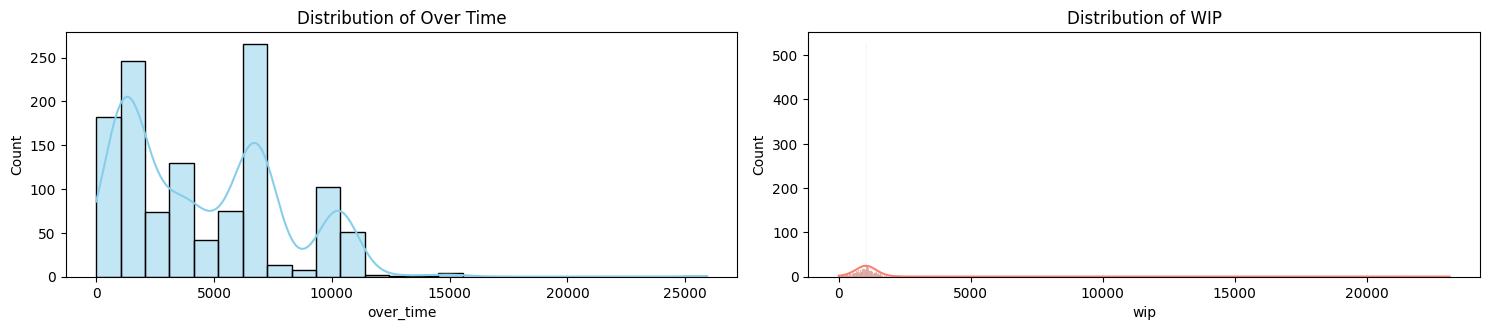

In [21]:
plt.figure(figsize=(15, 6))

# 1. Distribution of 'over_time' with KDE and Histogram
plt.subplot(2, 2, 1)
sns.histplot(df['over_time'], kde=True, color='skyblue')
plt.title('Distribution of Over Time')

# 2. Distribution of 'wip' with KDE and Histogram
plt.subplot(2, 2, 2)
sns.histplot(df['wip'], kde=True, color='salmon')
plt.title('Distribution of WIP')



plt.tight_layout()
plt.show()

C:\Users\gamer\AppData\Local\Temp\ipykernel_8576\1145922536.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='over_time_bins', y='actual_productivity', palette='Blues')
C:\Users\gamer\AppData\Local\Temp\ipykernel_8576\1145922536.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='wip_bins', y='actual_productivity', palette='Reds')


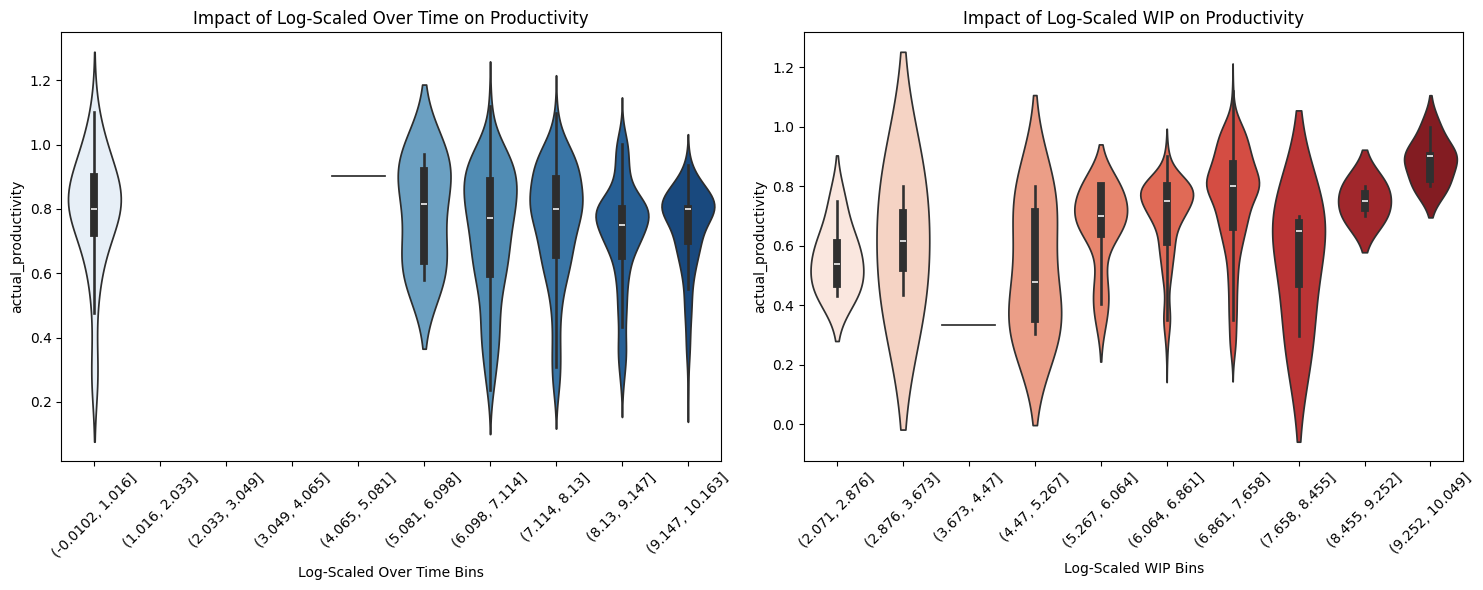

In [22]:
df['log_over_time'] = np.log1p(df['over_time'])  # log1p handles zero values
df['log_wip'] = np.log1p(df['wip'])

# Bin the transformed 'over_time' and 'wip' values
df['over_time_bins'] = pd.cut(df['log_over_time'], bins=10)
df['wip_bins'] = pd.cut(df['log_wip'], bins=10)

plt.figure(figsize=(15, 6))

# 1. Violin plot for 'log_over_time' bins vs 'actual_productivity'
plt.subplot(1, 2, 1)
sns.violinplot(data=df, x='over_time_bins', y='actual_productivity', palette='Blues')
plt.xticks(rotation=45)
plt.title('Impact of Log-Scaled Over Time on Productivity')
plt.xlabel('Log-Scaled Over Time Bins')

# 2. Violin plot for 'log_wip' bins vs 'actual_productivity'
plt.subplot(1, 2, 2)
sns.violinplot(data=df, x='wip_bins', y='actual_productivity', palette='Reds')
plt.xticks(rotation=45)
plt.title('Impact of Log-Scaled WIP on Productivity')
plt.xlabel('Log-Scaled WIP Bins')

plt.tight_layout()
plt.show()

In [23]:
df_cleaned.columns

Index(['date', 'team', 'targeted_productivity', 'smv', 'wip', 'over_time',
       'incentive', 'idle_time', 'idle_men', 'no_of_style_change',
       'no_of_workers', 'actual_productivity', 'day_Monday', 'day_Saturday',
       'day_Sunday', 'day_Thursday', 'day_Tuesday', 'day_Wednesday',
       'quarter_Quarter1', 'quarter_Quarter2', 'quarter_Quarter3',
       'quarter_Quarter4', 'quarter_Quarter5', 'department_finishing',
       'department_finishing ', 'department_sweing', 'day_of_week', 'month'],
      dtype='object')

In [24]:
X = df_cleaned.drop(columns=['actual_productivity', 'date'])  # Drop date if not needed in the model
y = df_cleaned['actual_productivity']
xtrain,xtest,ytrain,ytest = train_test_split(X,y, test_size=0.2,random_state=48)

In [25]:
metrics_columns = [ 'Model','Mean Absolute percentage Error (MAE)', 'Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)', 'R² Score']

# Create an empty DataFrame with these columns
metrics_df = pd.DataFrame(columns=metrics_columns)


In [26]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)
mae = mean_absolute_percentage_error(ytest, ypred)
mse = mean_squared_error(ytest, ypred)
rmse = root_mean_squared_error(ytest, ypred)  # or use root_mean_squared_error(ypred, ytest)
r2 = r2_score(ytest, ypred)
model = "Linear Regression"
metrics = {
    'Model': model,
    'Mean Absolute percentage Error (MAE)': mae,
    'Mean Squared Error (MSE)': mse,
    'Root Mean Squared Error (RMSE)': rmse,
    'R² Score': r2
}

# Append metrics to the DataFrame as a new row
metrics_df = metrics_df._append(metrics, ignore_index=True)

metrics_df

C:\Users\gamer\AppData\Local\Temp\ipykernel_8576\2448312473.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_df = metrics_df._append(metrics, ignore_index=True)


,Model,Mean Absolute percentage Error (MAE),Mean Squared Error (MSE),Root Mean Squared Error (RMSE),R² Score
0,Linear Regression,0.133329,0.01462,0.120912,0.375293


In [27]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)
mae = mean_absolute_percentage_error(ytest, ypred)
mse = mean_squared_error(ytest, ypred)
rmse = root_mean_squared_error(ytest, ypred)  # or use root_mean_squared_error(ypred, ytest)
r2 = r2_score(ytest, ypred)
model = "Random Forest"
metrics = {
    'Model': model,
    'Mean Absolute percentage Error (MAE)': mae,
    'Mean Squared Error (MSE)': mse,
    'Root Mean Squared Error (RMSE)': rmse,
    'R² Score': r2
}

# Append metrics to the DataFrame as a new row
metrics_df = metrics_df._append(metrics, ignore_index=True)

metrics_df

,Model,Mean Absolute percentage Error (MAE),Mean Squared Error (MSE),Root Mean Squared Error (RMSE),R² Score
0,Linear Regression,0.133329,0.014620,0.120912,0.375293
1,Random Forest,0.101544,0.010438,0.102167,0.553971


In [28]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)
mae = mean_absolute_percentage_error(ytest, ypred)
mse = mean_squared_error(ytest, ypred)
rmse = root_mean_squared_error(ytest, ypred)  # or use root_mean_squared_error(ypred, ytest)
r2 = r2_score(ytest, ypred)
model = " Gradient Boosting"
metrics = {
    'Model': model,
    'Mean Absolute percentage Error (MAE)': mae,
    'Mean Squared Error (MSE)': mse,
    'Root Mean Squared Error (RMSE)': rmse,
    'R² Score': r2
}

# Append metrics to the DataFrame as a new row
metrics_df = metrics_df._append(metrics, ignore_index=True)

metrics_df

,Model,Mean Absolute percentage Error (MAE),Mean Squared Error (MSE),Root Mean Squared Error (RMSE),R² Score
0,Linear Regression,0.133329,0.014620,0.120912,0.375293
1,Random Forest,0.101544,0.010438,0.102167,0.553971
2,Gradient Boosting,0.106063,0.010388,0.101921,0.556118


In [29]:
from sklearn.svm import SVR  
model = SVR()
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)
mae = mean_absolute_percentage_error(ytest, ypred)
mse = mean_squared_error(ytest, ypred)
rmse = root_mean_squared_error(ytest, ypred)  # or use root_mean_squared_error(ypred, ytest)
r2 = r2_score(ytest, ypred)
model = "Support Victor machine"
metrics = {
    'Model': model,
    'Mean Absolute percentage Error (MAE)': mae,
    'Mean Squared Error (MSE)': mse,
    'Root Mean Squared Error (RMSE)': rmse,
    'R² Score': r2
}

# Append metrics to the DataFrame as a new row
metrics_df = metrics_df._append(metrics, ignore_index=True)

metrics_df

,Model,Mean Absolute percentage Error (MAE),Mean Squared Error (MSE),Root Mean Squared Error (RMSE),R² Score
0,Linear Regression,0.133329,0.014620,0.120912,0.375293
1,Random Forest,0.101544,0.010438,0.102167,0.553971
2,Gradient Boosting,0.106063,0.010388,0.101921,0.556118
3,Support Victor machine,0.145265,0.015181,0.123212,0.351296


In [30]:
from sklearn.ensemble import AdaBoostRegressor  
model = AdaBoostRegressor()
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)
mae = mean_absolute_percentage_error(ytest, ypred)
mse = mean_squared_error(ytest, ypred)
rmse = root_mean_squared_error(ytest, ypred)  # or use root_mean_squared_error(ypred, ytest)
r2 = r2_score(ytest, ypred)
model = "Ada Boost"
metrics = {
    'Model': model,
    'Mean Absolute percentage Error (MAE)': mae,
    'Mean Squared Error (MSE)': mse,
    'Root Mean Squared Error (RMSE)': rmse,
    'R² Score': r2
}

# Append metrics to the DataFrame as a new row
metrics_df = metrics_df._append(metrics, ignore_index=True)

metrics_df

,Model,Mean Absolute percentage Error (MAE),Mean Squared Error (MSE),Root Mean Squared Error (RMSE),R² Score
0,Linear Regression,0.133329,0.014620,0.120912,0.375293
1,Random Forest,0.101544,0.010438,0.102167,0.553971
2,Gradient Boosting,0.106063,0.010388,0.101921,0.556118
3,Support Victor machine,0.145265,0.015181,0.123212,0.351296
4,Ada Boost,0.129295,0.012806,0.113164,0.452791


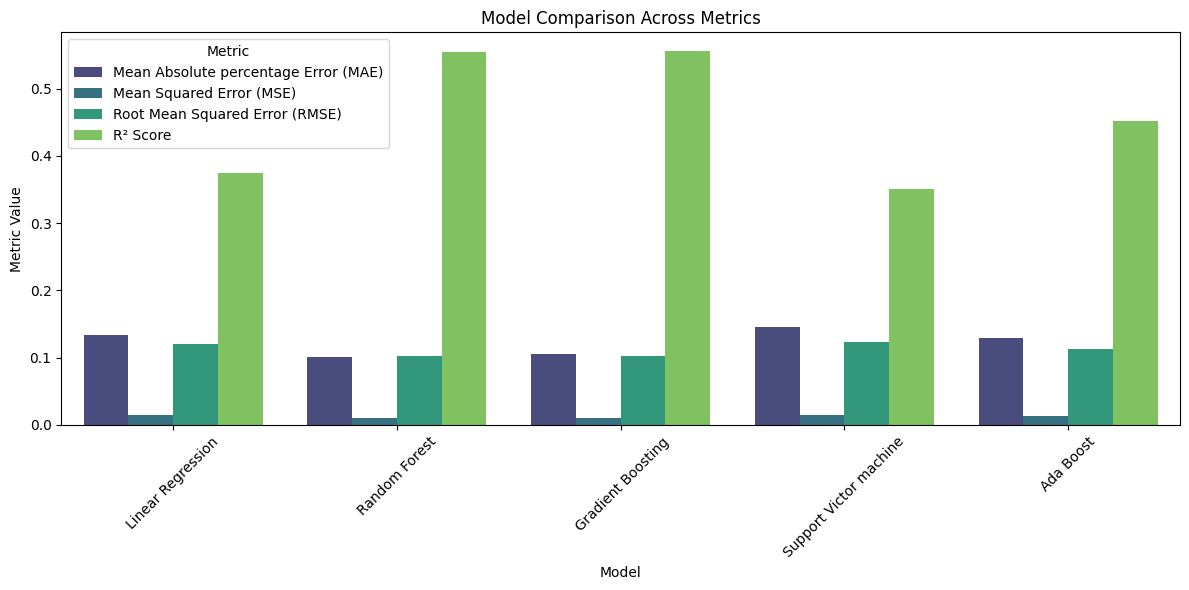

In [31]:
metrics_melted_df = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Value')

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a grouped bar plot
sns.barplot(data=metrics_melted_df, x='Model', y='Value', hue='Metric', palette='viridis')
plt.title('Model Comparison Across Metrics')
plt.xticks(rotation=45)
plt.ylabel('Metric Value')
plt.legend(title='Metric')

plt.tight_layout()
plt.show()

In [32]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 800],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Learning rate options
    'max_depth': [3, 4, 5, 6],  # Maximum depth of the trees
    'subsample': [0.6, 0.8, 1.0]  # Subsampling for each tree
}

# Initialize GridSearchCV with MAE scoring and cross-validation
grid_search = GridSearchCV(
    GradientBoostingRegressor(),
    param_grid,
    scoring='r2',  # Use MAE for scoring
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all available cores
    verbose=2  # Print progress for each combination
)

# Fit GridSearchCV
grid_search.fit(xtrain, ytrain)

# Output the best parameters and model
best_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)
print("r2:", -grid_search.best_score_)


Fitting 5 folds for each of 336 candidates, totalling 1680 fits


c:\Users\gamer\anaconda3\envs\ML-DL\lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 600, 'subsample': 1.0}
r2: -0.5242845296452705


In [33]:
ypred = best_model.predict(xtest)
mae = mean_absolute_percentage_error(ytest, ypred)
mse = mean_squared_error(ytest, ypred)
rmse = root_mean_squared_error(ytest, ypred)  # or use root_mean_squared_error(ypred, ytest)
r2 = r2_score(ytest, ypred)
model = "Gradient Boosting best heperparameter"
metrics = {
    'Model': model,
    'Mean Absolute Error (MAE)': mae,
    'Mean Squared Error (MSE)': mse,
    'Root Mean Squared Error (RMSE)': rmse,
    'R² Score': r2
}
metrics

{'Model': 'Gradient Boosting best heperparameter',
 'Mean Absolute Error (MAE)': np.float64(0.10403977887291749),
 'Mean Squared Error (MSE)': np.float64(0.010165662714921206),
 'Root Mean Squared Error (RMSE)': np.float64(0.10082491118231252),
 'R² Score': 0.5656141884775279}

In [34]:
import pandas as pd

def predict_productivity(data):
    # Convert input data to DataFrame
    data_df = pd.DataFrame(data)

    # Define feature types
    num_features = ['smv', 'wip', 'over_time', 'incentive']
    cat_features = ['day', 'quarter', 'department']

    # Encode categorical features
    encoded_cat_values = encoder.transform(data_df[cat_features])
    encoded_cat_df = pd.DataFrame(encoded_cat_values, columns=encoder.get_feature_names_out(cat_features))

    # Combine encoded categorical data with the input DataFrame and drop original categorical columns
    encoded_data = pd.concat([data_df.reset_index(drop=True), encoded_cat_df.reset_index(drop=True)], axis=1)
    encoded_data = encoded_data.drop(columns=cat_features)

    # Scale numerical features
    scaled_num_values = scaler.transform(encoded_data[num_features])
    scaled_num_df = pd.DataFrame(scaled_num_values, columns=num_features)

    # Concatenate scaled numerical data with the encoded DataFrame
    encoded_data[num_features] = scaled_num_df
    encoded_data['date'] = pd.to_datetime(encoded_data['date'])

    # Extract day of the week and month from date
    encoded_data['day_of_week'] = encoded_data['date'].dt.weekday
    encoded_data['month'] = encoded_data['date'].dt.month

    # Prepare final input for prediction by dropping the date column
    final_input = encoded_data.drop(columns=['date'])

    # Use the already fitted model to make predictions
    prediction = best_model.predict(final_input)
    
    return prediction


In [35]:
df = pd.read_csv('garments_worker_productivity.csv')
df_dropped = df.drop(columns=["actual_productivity"])

# Now get the first row
data = df_dropped.iloc[[0]].reset_index(drop=True)

data

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
0,1/1/2015,Quarter1,sweing,Thursday,8,0.8,26.16,1108.0,7080,98,0.0,0,0,59.0


In [36]:
print(predict_productivity(data))

[0.92955212]
